# Recurrence Neural Network

## Step 1: Load Data

Let's create a data.  In this case, we have a sequence $X = [1,2,3,4,5,4,3,2,1,2,3,4,5,4,3,2,1]$. 

We are to predict the next number of the sequence. 

In [285]:
import numpy as np
import matplotlib.pyplot as plt

In [286]:
sequence = [1,2,3,4,5,4,3,2,1,2,3,4,5,4,3,2,1]

In [287]:
print("Length of sequence is", len(sequence))

Length of sequence is 17


## Step 2: Build the model

We let $T=3$.  $T$ here is the length of the window.  That means we are looking at 3 numbers each to predict the next one.  

$$ \hat{x}_t = w_0 + w_1 x_{t-1} + w_2 x_{t-2} + w_3 x_{t-3}   $$

This creates 17 - 3 + 1 = 15 data samples. But since we don't have target value for the last term, we will have $N = 17 -3 = 14$ data and 14 target values.  

In [288]:
X = []
y = []
T = 3

for i in range(len(sequence) - T):
    X.append(list(series[i:i+T]))
    y.append(sequence[i+T])
    
X = np.array(X)
y = np.array(y)

In [289]:
N = len(X)
print(N, len(y))

14 14


In [290]:
X

array([[1, 2, 3],
       [2, 3, 4],
       [3, 4, 5],
       [4, 5, 4],
       [5, 4, 3],
       [4, 3, 2],
       [3, 2, 1],
       [2, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5],
       [4, 5, 4],
       [5, 4, 3],
       [4, 3, 2]])

In [291]:
y

array([4, 5, 4, 3, 2, 1, 2, 3, 4, 5, 4, 3, 2, 1])

Now, let's run ANN model to predict next value.  

In [292]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

Build the model

In [293]:
i = Input(shape=(T,))
x = Dense(1)(i)

model = Model(i,x)

## Step 3: Train model

Compile and fit

In [294]:
model.compile(loss = 'mse', optimizer = Adam(lr = 0.1))

In [295]:
r = model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 2ms/step - loss: 17.2668
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 9.9073
Epoch 3/100
1/1 [==============================] - 0s 997us/step - loss: 4.9863
Epoch 4/100
1/1 [==============================] - 0s 998us/step - loss: 2.4023
Epoch 5/100
1/1 [==============================] - 0s 992us/step - loss: 1.8151
Epoch 6/100
1/1 [==============================] - 0s 997us/step - loss: 2.5664
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 3.7888
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 4.7376
Epoch 9/100
1/1 [==============================] - 0s 0s/step - loss: 5.0512
Epoch 10/100
1/1 [==============================] - 0s 998us/step - loss: 4.7330
Epoch 11/100
1/1 [==============================] - 0s 997us/step - loss: 3.9891
Epoch 12/100
1/1 [==============================] - 0s 981us/step - loss: 3.0856
Epoch 13/100
1/1 [=============================

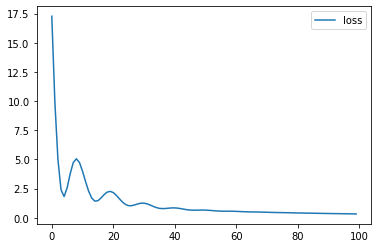

In [296]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.legend()

## Step 4: Evaluate the model

In [297]:
model.summary()

Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 3)]               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [298]:
print(model.predict(X))
print(len(model.predict(X)))

[[3.7212014 ]
 [4.2401056 ]
 [4.7590103 ]
 [3.1875482 ]
 [1.8692129 ]
 [1.3503082 ]
 [0.83140373]
 [2.402866  ]
 [3.7212014 ]
 [4.2401056 ]
 [4.7590103 ]
 [3.1875482 ]
 [1.8692129 ]
 [1.3503082 ]]
14


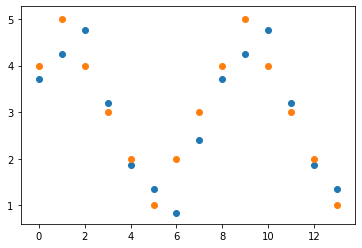

In [299]:
plt.scatter(np.arange(len(X)), model.predict(X), cmap = 'red')
plt.scatter(np.arange(len(X)), y)
plt.show()

In [300]:
print(model.get_weights())

[array([[-0.39971542],
       [-0.12656339],
       [ 1.0451833 ]], dtype=float32), array([1.2384934], dtype=float32)]


## Step 5: Make a prediction

Future values

In [301]:
print("The sequence is", sequence)

for i in range(len(X)):
    print(X[i], y[i],"predicted value is", model.predict(X)[i],)

The sequence is [1, 2, 3, 4, 5, 4, 3, 2, 1, 2, 3, 4, 5, 4, 3, 2, 1]
[1 2 3] 4 predicted value is [3.7212014]
[2 3 4] 5 predicted value is [4.2401056]
[3 4 5] 4 predicted value is [4.7590103]
[4 5 4] 3 predicted value is [3.1875482]
[5 4 3] 2 predicted value is [1.8692129]
[4 3 2] 1 predicted value is [1.3503082]
[3 2 1] 2 predicted value is [0.83140373]
[2 1 2] 3 predicted value is [2.402866]
[1 2 3] 4 predicted value is [3.7212014]
[2 3 4] 5 predicted value is [4.2401056]
[3 4 5] 4 predicted value is [4.7590103]
[4 5 4] 3 predicted value is [3.1875482]
[5 4 3] 2 predicted value is [1.8692129]
[4 3 2] 1 predicted value is [1.3503082]


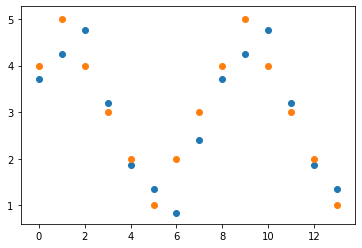

In [302]:
plt.scatter(np.arange(len(X)), model.predict(X))
plt.scatter(np.arange(len(X)), y)
plt.show()

Next 3 predicted values are 

In [303]:
W = np.array(sequence[-T:])

P =[]

for i in range(T):
    new_W = W.dot(model.get_weights()[0]) + model.get_weights()[1][0]
    
    P.append(float(new_W) )
    W = np.delete(np.concatenate((W,new_W)),0)
    
print("Next",T,"predicted values are",P)

Next 3 predicted values are [0.8314037024974823, 1.1814684764551053, 1.9684038741702603]


For $T = 3, 4, 10$,  it seems the prediction gets better as $T$ increases. 